In [10]:
from scipy.spatial import distance_matrix

In [11]:
def nearest_neighbor_tsp(dist_matrix, start_city=0):
    """
    Nearest Neighbor heuristic for solving the TSP.
    
    Parameters:
    - dist_matrix (numpy.ndarray): Distance matrix representing travel costs between cities.
    - start_city (int): Index of the starting city.
    
    Returns:
    - route (list): Order of cities visited.
    - total_distance (float): Total distance of the route.
    """
    num_cities = len(dist_matrix)
    visited = [False] * num_cities
    route = [start_city]
    total_distance = 0
    current_city = start_city
    visited[current_city] = True
    
    for _ in range(num_cities - 1):
        # Find the nearest unvisited city
        nearest_distance = float('inf')
        nearest_city = None
        for city in range(num_cities):
            if not visited[city] and dist_matrix[current_city, city] < nearest_distance:
                nearest_distance = dist_matrix[current_city, city]
                nearest_city = city
        
        # Move to the nearest city
        route.append(nearest_city)
        total_distance += nearest_distance
        current_city = nearest_city
        visited[current_city] = True
    
    # Return to the starting city
    total_distance += dist_matrix[current_city, start_city]
    route.append(start_city)
    
    return route, total_distance

In [12]:
file_path = 'data.txt'

# Initialize lists to store vehicle and customer data
vehicle_data = []
customer_data = []

# Read data line by line
with open(file_path, 'r') as file:
    lines = file.readlines()
    
    # Parse vehicle data
    vehicle_info_start = lines.index('VEHICLE\n') + 2
    vehicle_info_end = lines.index('CUSTOMER\n')
    vehicle_line = lines[vehicle_info_start].strip().split()
    
    # Store vehicle data as a dictionary in a list
    vehicle_data.append({
        'NUMBER': int(vehicle_line[0]),
        'CAPACITY': int(vehicle_line[1])
    })
    
    # Parse customer data
    customer_info_start = vehicle_info_end + 2
    for line in lines[customer_info_start:]:
        if line.strip():  # Skip any empty lines
            parts = line.strip().split()
            customer_data.append({
                'CUST_NO': int(parts[0]),
                'XCOORD': int(parts[1]),
                'YCOORD': int(parts[2]),
                'DEMAND': int(parts[3]),
                'READY_TIME': int(parts[4]),
                'DUE_DATE': int(parts[5]),
                'SERVICE_TIME': int(parts[6])
            })

# Display the parsed data
print("Vehicle Data:")
print(vehicle_data)
print("\nCustomer Data:")
for customer in customer_data:  # Show first 5 customers for brevity
    print(customer)


Vehicle Data:
[{'NUMBER': 25, 'CAPACITY': 200}]

Customer Data:
{'CUST_NO': 0, 'XCOORD': 40, 'YCOORD': 50, 'DEMAND': 0, 'READY_TIME': 0, 'DUE_DATE': 1236, 'SERVICE_TIME': 0}
{'CUST_NO': 1, 'XCOORD': 45, 'YCOORD': 68, 'DEMAND': 10, 'READY_TIME': 912, 'DUE_DATE': 967, 'SERVICE_TIME': 90}
{'CUST_NO': 2, 'XCOORD': 45, 'YCOORD': 70, 'DEMAND': 30, 'READY_TIME': 825, 'DUE_DATE': 870, 'SERVICE_TIME': 90}
{'CUST_NO': 3, 'XCOORD': 42, 'YCOORD': 66, 'DEMAND': 10, 'READY_TIME': 65, 'DUE_DATE': 146, 'SERVICE_TIME': 90}
{'CUST_NO': 4, 'XCOORD': 42, 'YCOORD': 68, 'DEMAND': 10, 'READY_TIME': 727, 'DUE_DATE': 782, 'SERVICE_TIME': 90}
{'CUST_NO': 5, 'XCOORD': 42, 'YCOORD': 65, 'DEMAND': 10, 'READY_TIME': 15, 'DUE_DATE': 67, 'SERVICE_TIME': 90}
{'CUST_NO': 6, 'XCOORD': 40, 'YCOORD': 69, 'DEMAND': 20, 'READY_TIME': 621, 'DUE_DATE': 702, 'SERVICE_TIME': 90}
{'CUST_NO': 7, 'XCOORD': 40, 'YCOORD': 66, 'DEMAND': 20, 'READY_TIME': 170, 'DUE_DATE': 225, 'SERVICE_TIME': 90}
{'CUST_NO': 8, 'XCOORD': 38, 'YCOORD':

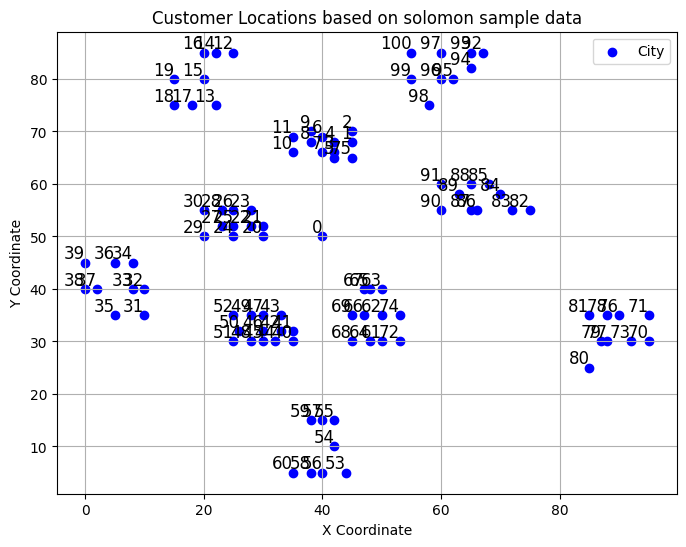

In [13]:
import numpy as np
import matplotlib.pyplot as plt
customer_locations = np.array([(customer['XCOORD'], customer['YCOORD']) for customer in customer_data])

# Step 2: Visualize the Cities
plt.figure(figsize=(8, 6))
plt.scatter(customer_locations[:, 0], customer_locations[:, 1], c='blue', label='City')
for i, (x, y) in enumerate(customer_locations):
    plt.text(x, y, f"{i}", fontsize=12, ha='right', va='bottom')
plt.title("Customer Locations based on solomon sample data")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()

Route: [0, 20, 21, 22, 23, 26, 28, 27, 25, 24, 29, 30, 34, 36, 39, 38, 37, 35, 31, 32, 33, 52, 49, 47, 43, 42, 41, 40, 44, 45, 46, 48, 50, 51, 59, 57, 55, 54, 53, 56, 58, 60, 68, 64, 61, 72, 74, 62, 66, 69, 67, 65, 63, 90, 89, 88, 85, 84, 83, 82, 86, 87, 91, 98, 96, 95, 94, 93, 92, 97, 100, 99, 2, 1, 4, 3, 5, 7, 8, 9, 6, 11, 10, 75, 13, 17, 18, 19, 15, 16, 14, 12, 81, 78, 76, 71, 70, 73, 77, 79, 80, 0]
Total Distance: 596.88


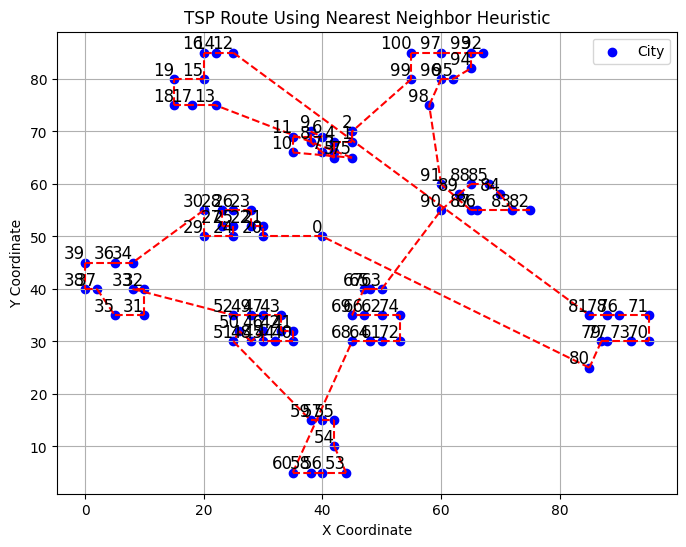

In [15]:
# Solve the TSP using the Nearest Neighbor heuristic
route, total_distance = nearest_neighbor_tsp(distance_matrix(customer_locations, customer_locations))

# Display the results
print(f"Route: {route}")
print(f"Total Distance: {total_distance:.2f}")

# Visualize the route
plt.figure(figsize=(8, 6))
plt.scatter(customer_locations[:, 0], customer_locations[:, 1], c='blue', label='City')
for i, (x, y) in enumerate(customer_locations):
    plt.text(x, y, f"{i}", fontsize=12, ha='right', va='bottom')

# Plot the route
for i in range(len(route) - 1):
    start, end = route[i], route[i + 1]
    plt.plot([customer_locations[start, 0], customer_locations[end, 0]], [customer_locations[start, 1], customer_locations[end, 1]], 'r--')


plt.title("TSP Route Using Nearest Neighbor Heuristic")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()
